In [85]:
import pandas as pd
import numpy as np
import os
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [86]:
os.getcwd()

'e:\\Bootcamp\\DS_Grupo3\\models\\catboost'

In [87]:
current_dir = os.getcwd()

parent_dir = os.path.abspath(os.path.join(current_dir, "../.."))
folder_path = 'data'
file_name = 'stroke_dataset.csv'

file_path = os.path.join(parent_dir, folder_path, file_name)

df = pd.read_csv(file_path)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Tratamiento de valores perdidos

In [88]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

No hay valores perdidos en el data set (que aparezcan como NaN).

### Tratamiento de valores atípicos

In [89]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [90]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores únicos en la columna '{column}': {unique_values}\n")

Valores únicos en la columna 'gender': ['Male' 'Female']

Valores únicos en la columna 'age': [6.70e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01 7.80e+01
 6.10e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 7.10e+01 5.20e+01
 8.20e+01 6.50e+01 5.70e+01 4.20e+01 4.80e+01 7.20e+01 5.80e+01 7.60e+01
 3.90e+01 7.70e+01 6.30e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01 5.90e+01
 6.60e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01 4.60e+01
 3.20e+01 5.10e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01 3.50e+01
 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01 4.00e+00
 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01 3.30e+01
 2.40e+01 3.60e+01 6.40e-01 3.40e+01 4.10e+01 8.80e-01 5.00e+00 2.60e+01
 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01 2.80e+01
 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00 1.00e+00
 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00 1.24e+00
 8.00e-01 4.00e-01 8.00e-02 1.

In [91]:
df.loc[df['age'] == df['age'].min(), ]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1487,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3057,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [92]:
decimal_ages = df.loc[(df['age'] > 1) & (df['age'] < 2) & (df['age'] % 1 != 0), 'age']
print(decimal_ages)

502     1.80
536     1.08
545     1.80
615     1.80
681     1.16
        ... 
4807    1.32
4941    1.88
4945    1.08
4946    1.80
4973    1.32
Name: age, Length: 68, dtype: float64


In [93]:
decimal_ages = df.loc[(df['age'] > 2) & (df['age'] < df['age'].max()) & (df['age'] % 1 != 0), 'age']
print(decimal_ages)

Series([], Name: age, dtype: float64)


Parece que solo hay valores decimales en la edad en los casos de niñes menores de 2 años.

In [94]:
df.loc[(df['age'] < 2), 'stroke'].value_counts()

stroke
0    113
1      1
Name: count, dtype: int64

Hay un solo caso de stroke en niños menores de 2 años, como no parece que vaya a influir en el entrenamiento y mantener la consistencia de los datos, podemos agrupar estas edades redondeando al valor suprerior (es decir 0.5 años será 1, por ejemplo)

In [95]:
df.loc[df['age'] < 2, 'age'] = df.loc[df['age'] < 2, 'age'].round(0)

In [96]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419996,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662582,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Vamos a comprobar que no haya combinaciones extrañas de valores:

In [97]:
df.loc[df['work_type'] == 'children', 'age'].value_counts()

age
2.0     88
5.0     63
1.0     62
8.0     55
3.0     46
12.0    45
13.0    44
9.0     38
11.0    36
10.0    34
4.0     32
7.0     31
14.0    27
6.0     24
15.0    19
0.0     18
16.0    11
Name: count, dtype: int64

In [98]:
df.loc[df['age'] < 16, 'work_type'].value_counts()

work_type
children         662
Private           50
Self-employed      8
Govt_job           2
Name: count, dtype: int64

Parece extraño que haya niños con trabajo, vamos a comprobar esos casos.

In [99]:
df.loc[(df['work_type'] == 'Private') & (df['age'] < 16), 'age'].value_counts()

age
15.0    21
14.0    19
13.0     9
8.0      1
Name: count, dtype: int64

In [100]:
df.loc[(df['work_type'] == 'Self-employed') & (df['age'] < 16), 'age'].value_counts()

age
14.0    4
15.0    2
7.0     1
13.0    1
Name: count, dtype: int64

In [101]:
df.loc[(df['work_type'] == 'Govt_job') & (df['age'] < 16), 'age'].value_counts()

age
14.0    1
15.0    1
Name: count, dtype: int64

Si bien podemos encontrarnos ante datos de paises en los que sea legal trabajar en casos de menores de edad (menores de 16 en nuestro caso), por ser coherentes vamos a modificar todos esos valores a 'children', que será una característica más definitoria de estos casos (a priori).

In [102]:
df.loc[(df['age'] < 16) & (df['work_type'] != 'children'), 'work_type'] = 'children'

Hemos visto que también hay unos casos de 'Unknown' para la variable de 'smoke'. Podemos considerar estos valores como perdidos ya que no ofrecen ninguna información y, teniendo en cuenta la teoría, parece que fumador será una variable relevante para determinar si una persona es fumadora o no. 

In [103]:
df.loc[df['smoking_status'] == 'Unknown'].count()

gender               1500
age                  1500
hypertension         1500
heart_disease        1500
ever_married         1500
work_type            1500
Residence_type       1500
avg_glucose_level    1500
bmi                  1500
smoking_status       1500
stroke               1500
dtype: int64

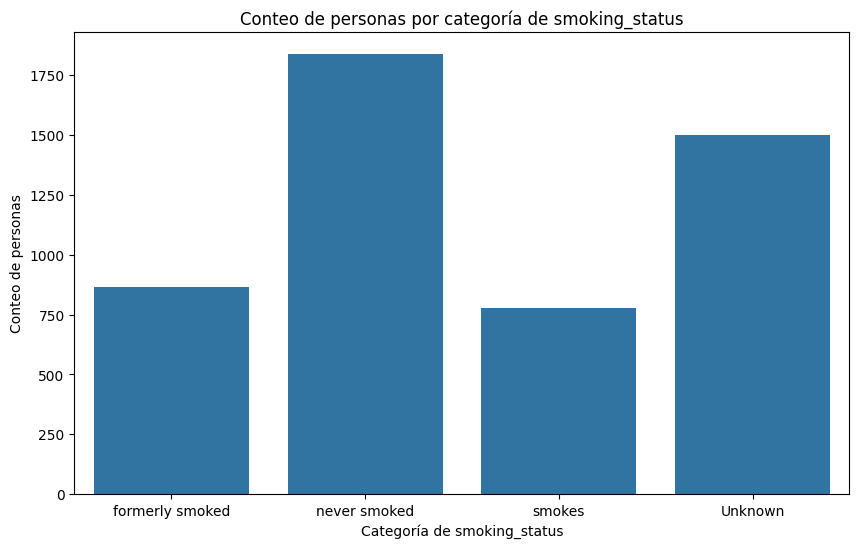

In [104]:
import seaborn as sns

import matplotlib.pyplot as plt

# Crear la gráfica de conteo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status')
plt.title('Conteo de personas por categoría de smoking_status')
plt.xlabel('Categoría de smoking_status')
plt.ylabel('Conteo de personas')
plt.show()

En este caso tenemos mucha información perdida para la variable de fumadores, por lo que no podemos eliminar los casos sin más. Podemos intentar hacer un trabajo de lógica para recuperar algunos datos.

In [105]:
df.loc[(df['smoking_status'] == 'Unknown') & (df['age'] < 10)].count()

gender               459
age                  459
hypertension         459
heart_disease        459
ever_married         459
work_type            459
Residence_type       459
avg_glucose_level    459
bmi                  459
smoking_status       459
stroke               459
dtype: int64

Tenemos casi 500 casos de Unknown para niños por debajo de 10 años. Aunque existe la posibilidad de que sean fumadores, parece poco probable que en casos tan jovenes sean o hayan sido fumadores, con lo que podemos asumir que en esa categoría encontraremos 'no fumadores'

In [106]:
df.loc[(df['smoking_status'] == 'Unknown') & (df['age'] < 10), 'smoking_status'] = 'never smoked'

Aún así seguimos teniendo 1000 casos de datos perdidos. Podemos intentar imputarlos con alguna técnica avanzada, aunque a nivel teórico se desaconseja trabajar con un porcentaje tan alto de datos perdidos para hacer inferencias.

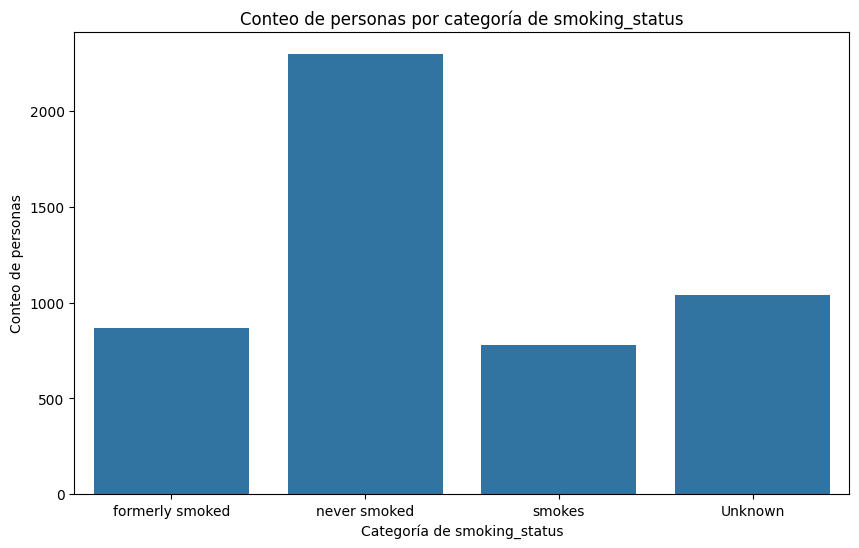

In [107]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status')
plt.title('Conteo de personas por categoría de smoking_status')
plt.xlabel('Categoría de smoking_status')
plt.ylabel('Conteo de personas')
plt.show()

In [108]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'smoking_status':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

smoking_status_mapping = {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': np.nan}
df['smoking_status'] = df['smoking_status'].map(smoking_status_mapping)

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

reverse_smoking_status_mapping = {0: 'formerly smoked', 1: 'never smoked', 2: 'smokes'}
df_imputed['smoking_status'] = df_imputed['smoking_status'].round().map(reverse_smoking_status_mapping)

for column, le in label_encoders.items():
    df_imputed[column] = le.inverse_transform(df_imputed[column].astype(int))

df['smoking_status'] = df_imputed['smoking_status']

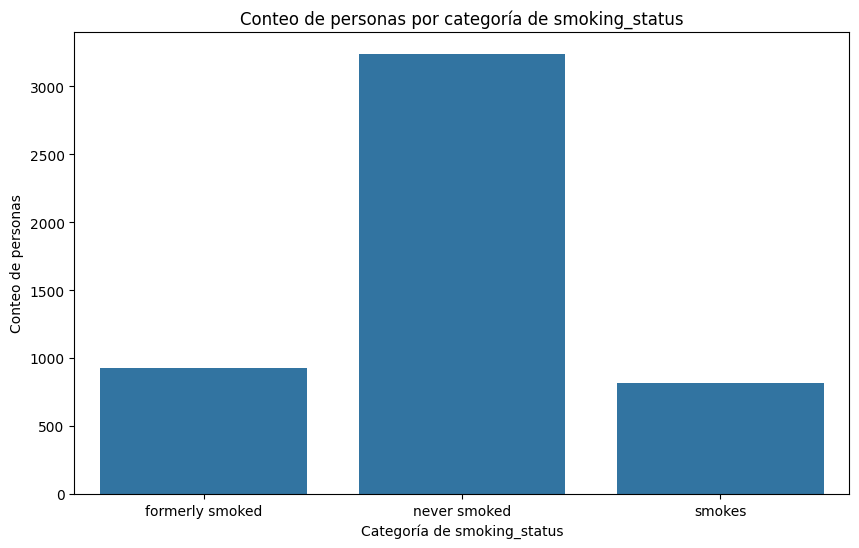

In [109]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status')
plt.title('Conteo de personas por categoría de smoking_status')
plt.xlabel('Categoría de smoking_status')
plt.ylabel('Conteo de personas')
plt.show()

De esta forma hemos conseguido limpiar bastante el dataset, sin embargo tenemos el problema de la sobrerepresentación de personas que nunca han fumado en el dataset, lo que puede provocar que el modelo no generalice bien sus predicciones.

Para compensarlo vamos a probar a utilizar una técnica de sobremuestro (oversampling) llamada SMOTE (synthetic minority over-sampling technique).

In [110]:
# Convertimos primero la variable a numéricos
smoking_status_mapping = {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2}
df['smoking_status'] = df['smoking_status'].map(smoking_status_mapping)

X = df.drop('smoking_status', axis=1)
y = df['smoking_status']

smote = SMOTE(sampling_strategy='auto', random_state=1337)

X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

reverse_smoking_status_mapping = {0: 'formerly smoked', 1: 'never smoked', 2: 'smokes'}
df_resampled['smoking_status'] = df_resampled['smoking_status'].map(reverse_smoking_status_mapping)

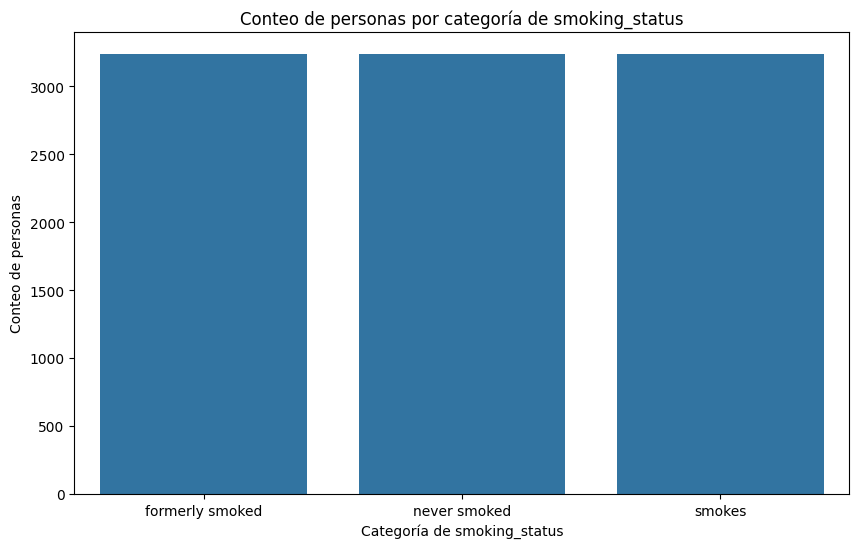

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_resampled, x='smoking_status')
plt.title('Conteo de personas por categoría de smoking_status')
plt.xlabel('Categoría de smoking_status')
plt.ylabel('Conteo de personas')
plt.show()

Para entrenar el modelo vamos a recodificar las variables categóricas, para ello vamos a utilizar get_dummies.

In [112]:
columnas_cat = df_resampled.select_dtypes(include=['object']).columns

df_recoded = pd.get_dummies(df_resampled, columns=columnas_cat, dtype = int)

In [113]:
df_recoded.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1,0,0
1,1,80.0,0,1,1,1,0,105.92,32.5,1,0,1,0
2,0,49.0,0,0,1,1,1,171.23,34.4,1,0,0,1
3,0,79.0,1,0,1,2,0,174.12,24.0,1,0,1,0
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1,0,0


In [114]:
parent_dir = os.path.abspath(os.path.join(current_dir, "../.."))
folder_path = 'data'
file_name = 'stroke_dataset_cleaned.csv'

file_path = os.path.join(parent_dir, folder_path, file_name)

df_recoded.to_csv(file_path, index=False)